# PoDS 22/23 Week 5

## Outline

* `pd.Series` and `pd.DataFrame`: not a very important distinction, but we need to have a better understanding now. In a nutshell, a Series can be seen as a unidimensional DataFrame; it has a single index associated with a list of values. A DataFrame can been as collection of Series; each individual column is a Series, sharing the same index (the row labels); each row is a Series, sharing the same index (column labels). 

* **index alignment**: we have made use of it before; this is done automatically for computations that involve multiple DataFrames and Series; for example, for element-wise operations, values from two DataFrames are paired according to the index values.

* **feature engineering**: an important part of data pre-processing/exploration/analysis; one might want to engineer one of more features - normally, based on transformations and computations on existing features. We have done it before (e.g., insomnia groups).

* **feature transformations**: some more specific examples of the above, such as discretisation and power transform.

## The Usual Preamble

In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='talk', rc={'figure.figsize': (10,6)}, font_scale=0.8)

We will make use of the familiar `gapminder` for some of examples and exercises.

In [2]:
dataset_location = 'https://raw.githubusercontent.com/gerberl/6G7V0026-2223/main/datasets/gapminder.tsv'
gm = pd.read_csv(
    dataset_location,
    sep='\t'
)

A quick check:

In [3]:
gm.sample()

,country,continent,year,lifeExp,pop,gdpPercap
713,Indonesia,Asia,1977,52.702,136725000,1382.702056


## DataFrames and Series

In [4]:
gm_2007 = gm.loc[ gm['year']==2007 ]

In [5]:
gm_2007.head(1)

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338


In [6]:
gm_2007 = gm_2007.set_index('country')

In [7]:
gm_2007.head(1)

,continent,year,lifeExp,pop,gdpPercap
country,,,,,
Afghanistan,Asia,2007,43.828,31889923,974.580338


In [8]:
gm_2007.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       ...
       'Uganda', 'United Kingdom', 'United States', 'Uruguay', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=142)

In [9]:
gm_2007.columns

Index(['continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [10]:
type(gm_2007)

pandas.core.frame.DataFrame

`gm_2007` is a DataFrame - a tabular structure, with a row and column index. Each index is a set of labels, which can be of different types (most commonly, integers and strings, which is what we've worked with so far; but, also, dates and timestamps, but this is for future classes).

In [11]:
china_row = gm_2007.loc['China']

In [12]:
china_row

continent           Asia
year                2007
lifeExp           72.961
pop           1318683096
gdpPercap    4959.114854
Name: China, dtype: object

In [13]:
type(china_row)

pandas.core.series.Series

In [14]:
china_row.index

Index(['continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

`china_row` is a Series - can be seen as a unidimensional DataFrame. Think of a vector, or a specialised Python dictionary, where we can refer to values by a label. Notice that its index is the same as `gm_2007`'s column index.

In [15]:
year_col = gm_2007['year']

In [16]:
year_col.head()

country
Afghanistan    2007
Albania        2007
Algeria        2007
Angola         2007
Argentina      2007
Name: year, dtype: int64

In [17]:
type(year_col)

pandas.core.series.Series

In [18]:
year_col.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       ...
       'Uganda', 'United Kingdom', 'United States', 'Uruguay', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=142)

### Checkpoint

What is the difference between:
    
* `gm['year']`
* `gm[['year']]`

In [53]:
gm['year']

0       1952
1       1957
2       1962
3       1967
4       1972
        ... 
1699    1987
1700    1992
1701    1997
1702    2002
1703    2007
Name: year, Length: 1704, dtype: int64

In [54]:
gm[['year']]

,year
0,1952
1,1957
2,1962
3,1967
4,1972
...,...
1699,1987
1700,1992
1701,1997
1702,2002


## Derived Features and Index Aligment

For a particular year, we could obtain the total population of the countries listed in `gapminder` (as I am planning to make changes to that slice of the data, I am going to take a __copy__ of it).

In [19]:
gm_2007 = (gm.loc[ gm['year']==2007 ]).copy()

In [20]:
total_pop = gm_2007['pop'].sum()
total_pop

6251013179

With __vectorisation__, one can produce a derived feature, involving the column `pop`, to obtain the percentage of the total population for each country:

In [21]:
(gm_2007['pop'] / total_pop * 100).head()

11    0.510156
23    0.057599
35    0.533245
47    0.198695
59    0.644726
Name: pop, dtype: float64

Thanks to __index alignment__, we can add this derived feature to our DataFrame by, for example, **assigning it** to a **non-existing column label** in the DataFrame:

In [22]:
gm_2007['popPerc'] = gm_2007['pop'] / total_pop * 100
# equivalent to
# gm_2007.loc[:, 'popPerc'] = gm_2007['pop'] / total_pop * 100

In [23]:
gm_2007.sort_values('popPerc').tail()

,country,continent,year,lifeExp,pop,gdpPercap,popPerc
179,Brazil,Americas,2007,72.390,190010647,9065.800825,3.039678
719,Indonesia,Asia,2007,70.650,223547000,3540.651564,3.576172
1619,United States,Americas,2007,78.242,301139947,42951.653090,4.817458
707,India,Asia,2007,64.698,1110396331,2452.210407,17.763462
299,China,Asia,2007,72.961,1318683096,4959.114854,21.095510


I feel that I would rather see population in millions - again, we can produce a derived feature from a simple arithmetic expression and, this time, assign that to an existing column:

In [24]:
gm_2007['pop'] = gm_2007['pop'] / 1000000

In [25]:
gm_2007.sort_values('popPerc').tail()

,country,continent,year,lifeExp,pop,gdpPercap,popPerc
179,Brazil,Americas,2007,72.390,190.010647,9065.800825,3.039678
719,Indonesia,Asia,2007,70.650,223.547000,3540.651564,3.576172
1619,United States,Americas,2007,78.242,301.139947,42951.653090,4.817458
707,India,Asia,2007,64.698,1110.396331,2452.210407,17.763462
299,China,Asia,2007,72.961,1318.683096,4959.114854,21.095510


### Checkpoint

Can we reverse-engineer the countries' GDPs?

More on index alignment and vectorised operations can be found [in this section](https://learning.oreilly.com/library/view/python-data-science/9781491912126/ch03.html#operating-on-data-in-pandas) in our Python Data Science Handbook text.

## Comparing Groups When They Share the Same Index

In [26]:
china = gm.loc[ gm['country']=='China' ].set_index('year')

In [27]:
china.head(3)

,country,continent,lifeExp,pop,gdpPercap
year,,,,,
1952,China,Asia,44.00000,556263527,400.448611
1957,China,Asia,50.54896,637408000,575.987001
1962,China,Asia,44.50136,665770000,487.674018


In [28]:
india = gm.loc[ gm['country']=='India' ].set_index('year')

In [29]:
india.head(3)

,country,continent,lifeExp,pop,gdpPercap
year,,,,,
1952,India,Asia,37.373,372000000,546.565749
1957,India,Asia,40.249,409000000,590.061996
1962,India,Asia,43.605,454000000,658.347151


In [30]:
china['lifeExp'] - india['lifeExp']

year
1952     6.62700
1957    10.29996
1962     0.89636
1967    11.18812
1972    12.46788
1977     9.75936
1982     8.92900
1987     8.72100
1992     8.46700
1997     8.66100
2002     9.14900
2007     8.26300
Name: lifeExp, dtype: float64

This gives us a nice opportunity to illustrate the use of `concat` for aligning slices (that share an index) into a new DataFrame. Notice also the use of `.columns` for renaming.

In [31]:
df = pd.concat([ 
    china['lifeExp'], india['lifeExp'], china['lifeExp'] - india['lifeExp']
], axis='columns')
df

,lifeExp,lifeExp,lifeExp
year,,,
1952,44.00000,37.373,6.62700
1957,50.54896,40.249,10.29996
1962,44.50136,43.605,0.89636
1967,58.38112,47.193,11.18812
1972,63.11888,50.651,12.46788
1977,63.96736,54.208,9.75936
1982,65.52500,56.596,8.92900
1987,67.27400,58.553,8.72100
1992,68.69000,60.223,8.46700


In [32]:
df = df.set_axis([ 'China_lifeExp', 'India_lifeExp', 'lifeExp_diff'], axis='columns')
df

,China_lifeExp,India_lifeExp,lifeExp_diff
year,,,
1952,44.00000,37.373,6.62700
1957,50.54896,40.249,10.29996
1962,44.50136,43.605,0.89636
1967,58.38112,47.193,11.18812
1972,63.11888,50.651,12.46788
1977,63.96736,54.208,9.75936
1982,65.52500,56.596,8.92900
1987,67.27400,58.553,8.72100
1992,68.69000,60.223,8.46700


As always, we can make use building blocks that we have already learned:

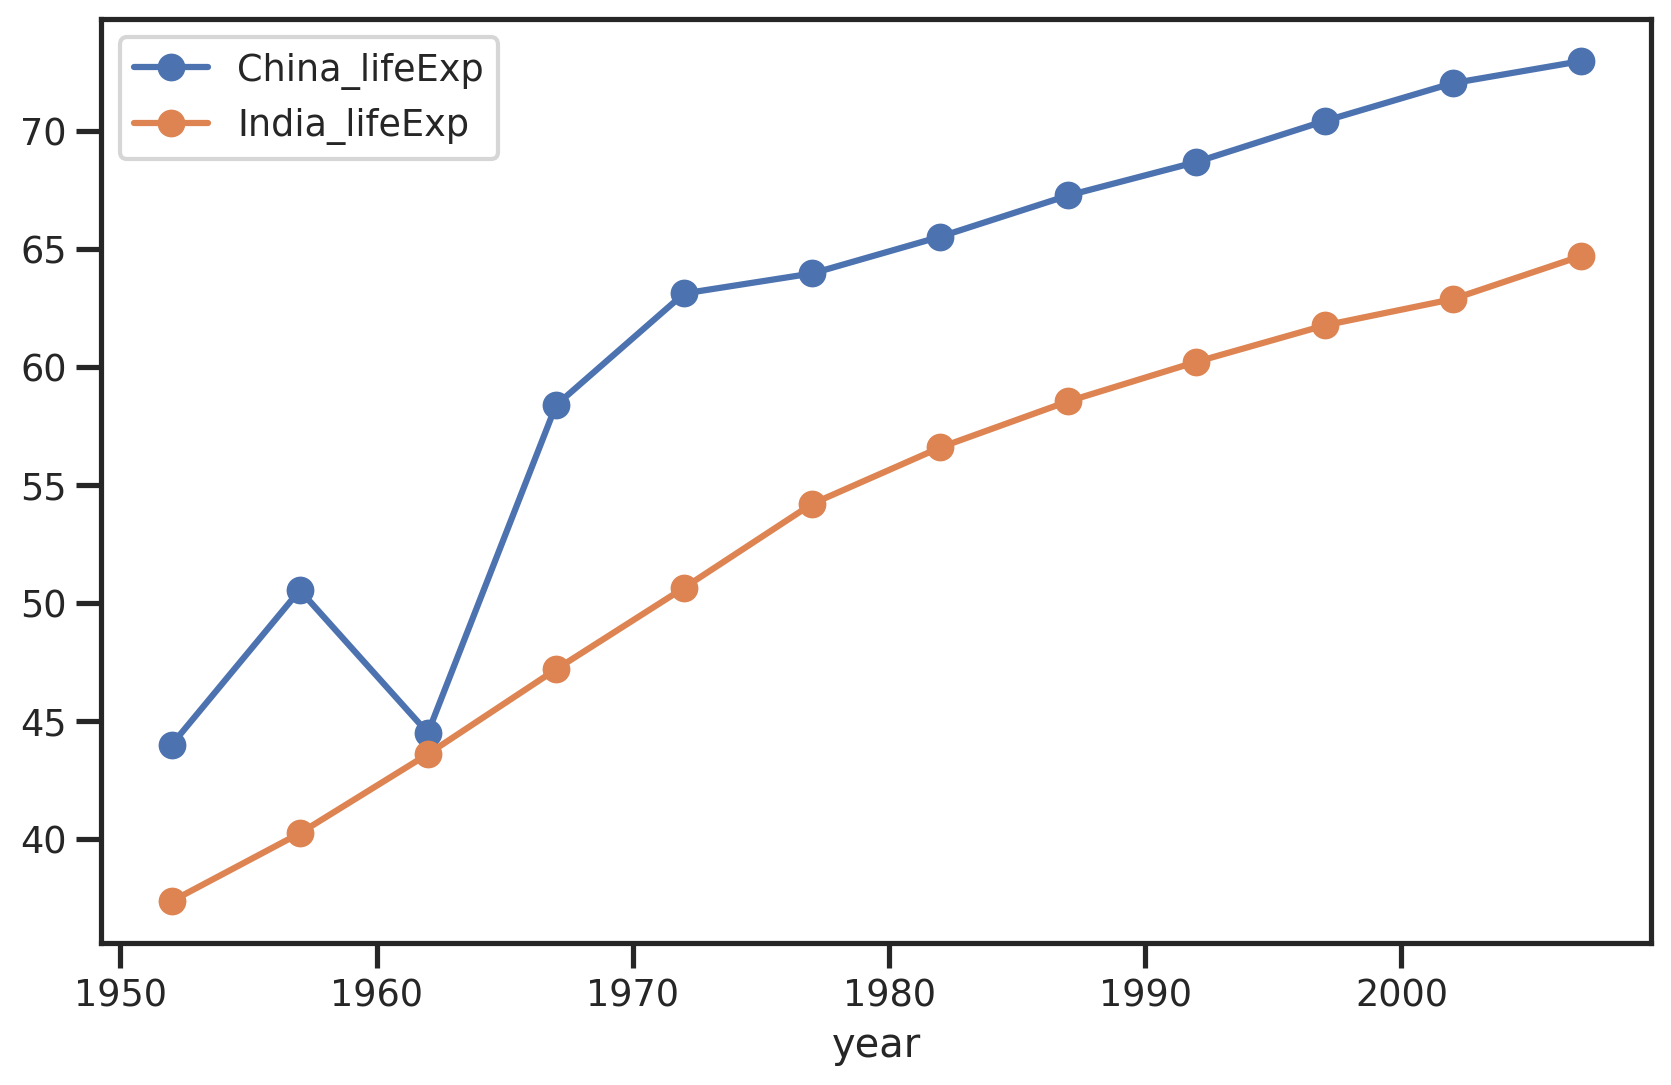

In [33]:
df[['China_lifeExp','India_lifeExp']].plot.line(marker='o');

Notice that, by default, the `.plot` functionality treats the **row index** as x-axis and the **column index** as different data series in the y-axis. And it gives you a legend for free. You can always customise it, as we've done is previous weeks, by capturing the returning `matplotlib` **axes** object, and execute methods on it such as `.set_xlabel()`.

### Checkpoint

Using `states` below, obtain:

* population density (assuming area is given in square Km, we are looking for number of people per Km<sup>2</sup>). Add it to the DataFrame as a new feature.

* by how much a state's area is greater or smaller than the mean area.

* the state populations in millions.

This is a tiny dataset on US states (used in the Python Data Science Handbook) that is useful for illustration:

In [34]:
states = pd.DataFrame(
    {
        'area': {'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995},
        'pop': {'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135}
    }
)

Notice that we instantiate a DataFrame from a Python data structure (we've done this before) - in this case, a dictionary, where each key (a column label) points to a dictionary associating US state names to area and population. Normally, we would creating DataFrames from data in files, but this approach can be useful in number of situations (e.g.,  testing/debugging/learning purposes).

More on dictionaries? You could take a look at [this section](https://jakevdp.github.io/WhirlwindTourOfPython/06-built-in-data-structures.html#Dictionaries) of A Whirlwind Tour of Python.

In [35]:
states

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


## Transformations to Feature Domains

### Discretisation (with `pd.cut()`)

Back to the PIMA Diabetes dataset - one could think of working with BMI as **categorical** rather than a **continuous** data type. **Discretising** (i.e., changing from continuous to discrete categories) can be achived, for example, via the [`pd.cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) function as the example below shows.

The standard definition (e.g., from Wikipedia) of different BMI bands is:

* *Underweight*: < 18.5.
* *Normal weight*: between 18.5 and 25.
* *Overweight*: between 25 to 30.
* *Obese*: 30 or greater.

In [36]:
pima = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0026-2223/main/datasets/pima-indians-diabetes/diabetes.csv')

In [37]:
pima.loc[[1]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0


In [38]:
pima['BMI'].min(), pima['BMI'].max()

(0.0, 67.1)

In [39]:
max_BMI = pima['BMI'].max()
pd.cut(
    pima['BMI'],
    bins=[0, 18.5, 25, 30, 67.2],
    right=False, include_lowest=True
)

0      [30.0, 67.2)
1      [25.0, 30.0)
2      [18.5, 25.0)
3      [25.0, 30.0)
4      [30.0, 67.2)
           ...     
763    [30.0, 67.2)
764    [30.0, 67.2)
765    [25.0, 30.0)
766    [30.0, 67.2)
767    [30.0, 67.2)
Name: BMI, Length: 768, dtype: category
Categories (4, interval[float64, left]): [[0.0, 18.5) < [18.5, 25.0) < [25.0, 30.0) < [30.0, 67.2)]

Notice that `pandas` creates a `category` that is **ordinal** (`[low < normal < overweight < obese]`), and that the parameters `right` and `include_lowest` indicate whether the intervals are open or closed, and at which endpoint. 

We can name those intervals for easier recall:

In [40]:
pima['BMI_cat'] = pd.cut(
    pima['BMI'],
    bins=[0, 18.5, 25, 30, 67.2],
    labels=['low', 'normal', 'overweight', 'obese'],
    right=False,
    include_lowest=True
)

In [41]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat
0,6,148,72,35,0,33.6,0.627,50,1,obese
1,1,85,66,29,0,26.6,0.351,31,0,overweight
2,8,183,64,0,0,23.3,0.672,32,1,normal
3,1,89,66,23,94,28.1,0.167,21,0,overweight
4,0,137,40,35,168,43.1,2.288,33,1,obese


In [42]:
pima['BMI_cat'].value_counts()

obese         472
overweight    179
normal        102
low            15
Name: BMI_cat, dtype: int64

### Mapping domain into a different set of values (with `.map()`):

In [43]:
pima['Outcome'].map({1: 'Diabetic', 0: 'Non-Diabetic'})

0          Diabetic
1      Non-Diabetic
2          Diabetic
3      Non-Diabetic
4          Diabetic
           ...     
763    Non-Diabetic
764    Non-Diabetic
765    Non-Diabetic
766        Diabetic
767    Non-Diabetic
Name: Outcome, Length: 768, dtype: object

In [44]:
pima['Outcome_Group'] = pima['Outcome'].map({1: 'Diabetic', 0: 'Non-Diabetic'})

In [45]:
pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat,Outcome_Group
0,6,148,72,35,0,33.6,0.627,50,1,obese,Diabetic
1,1,85,66,29,0,26.6,0.351,31,0,overweight,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,1,normal,Diabetic
3,1,89,66,23,94,28.1,0.167,21,0,overweight,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,1,obese,Diabetic


Another example of vectorised transformations - this time, on categories (which are strings). More on vectorised string operations [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html).

In [46]:
pima['BMI_cat'] = pima['BMI_cat'].str.title()

### Transformation of Scale (Into Orders of Magnitude)

In [47]:
titanic = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0026-2223/main/datasets/titanic-kaggle/titanic.csv')

In [48]:
titanic.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0,C128,S


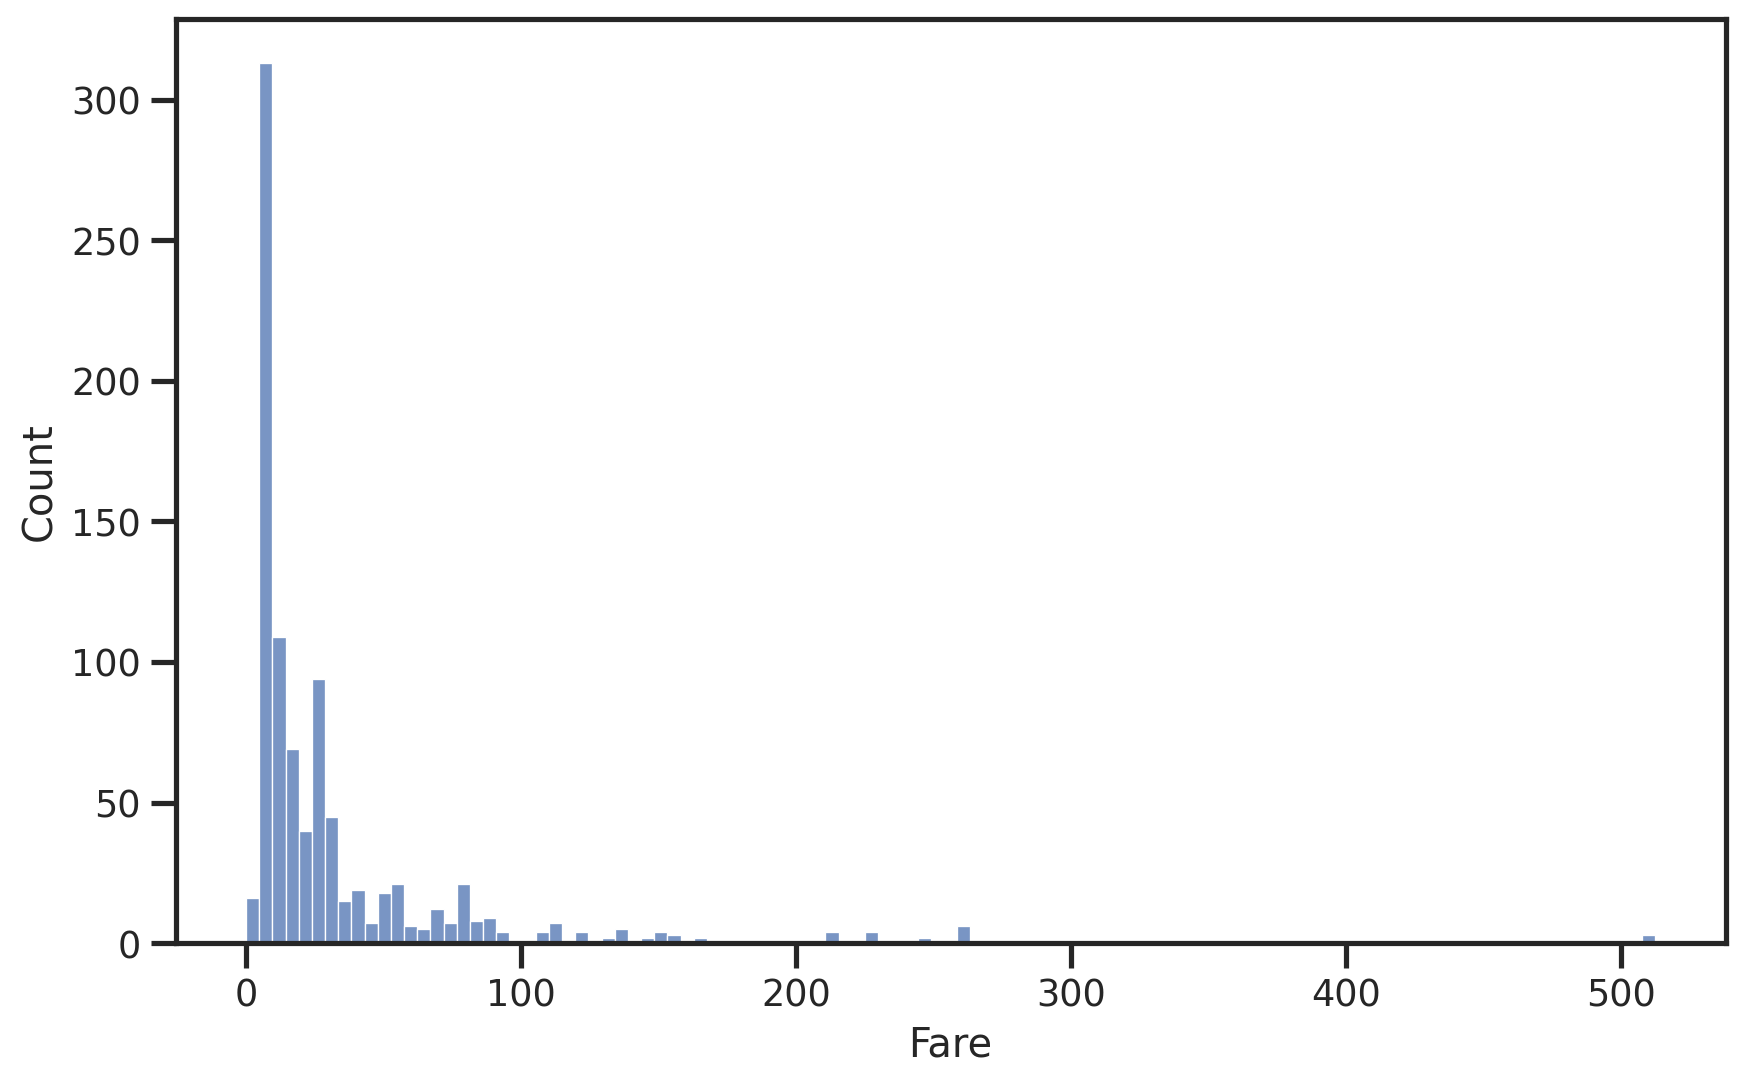

In [49]:
sns.histplot(titanic['Fare']);

In [50]:
np.log10(titanic.loc[ titanic['Fare']>0, 'Fare' ])

0      0.860338
1      1.852988
2      0.898999
3      1.725095
4      0.905796
         ...   
886    1.113943
887    1.477121
888    1.370143
889    1.477121
890    0.889302
Name: Fare, Length: 876, dtype: float64

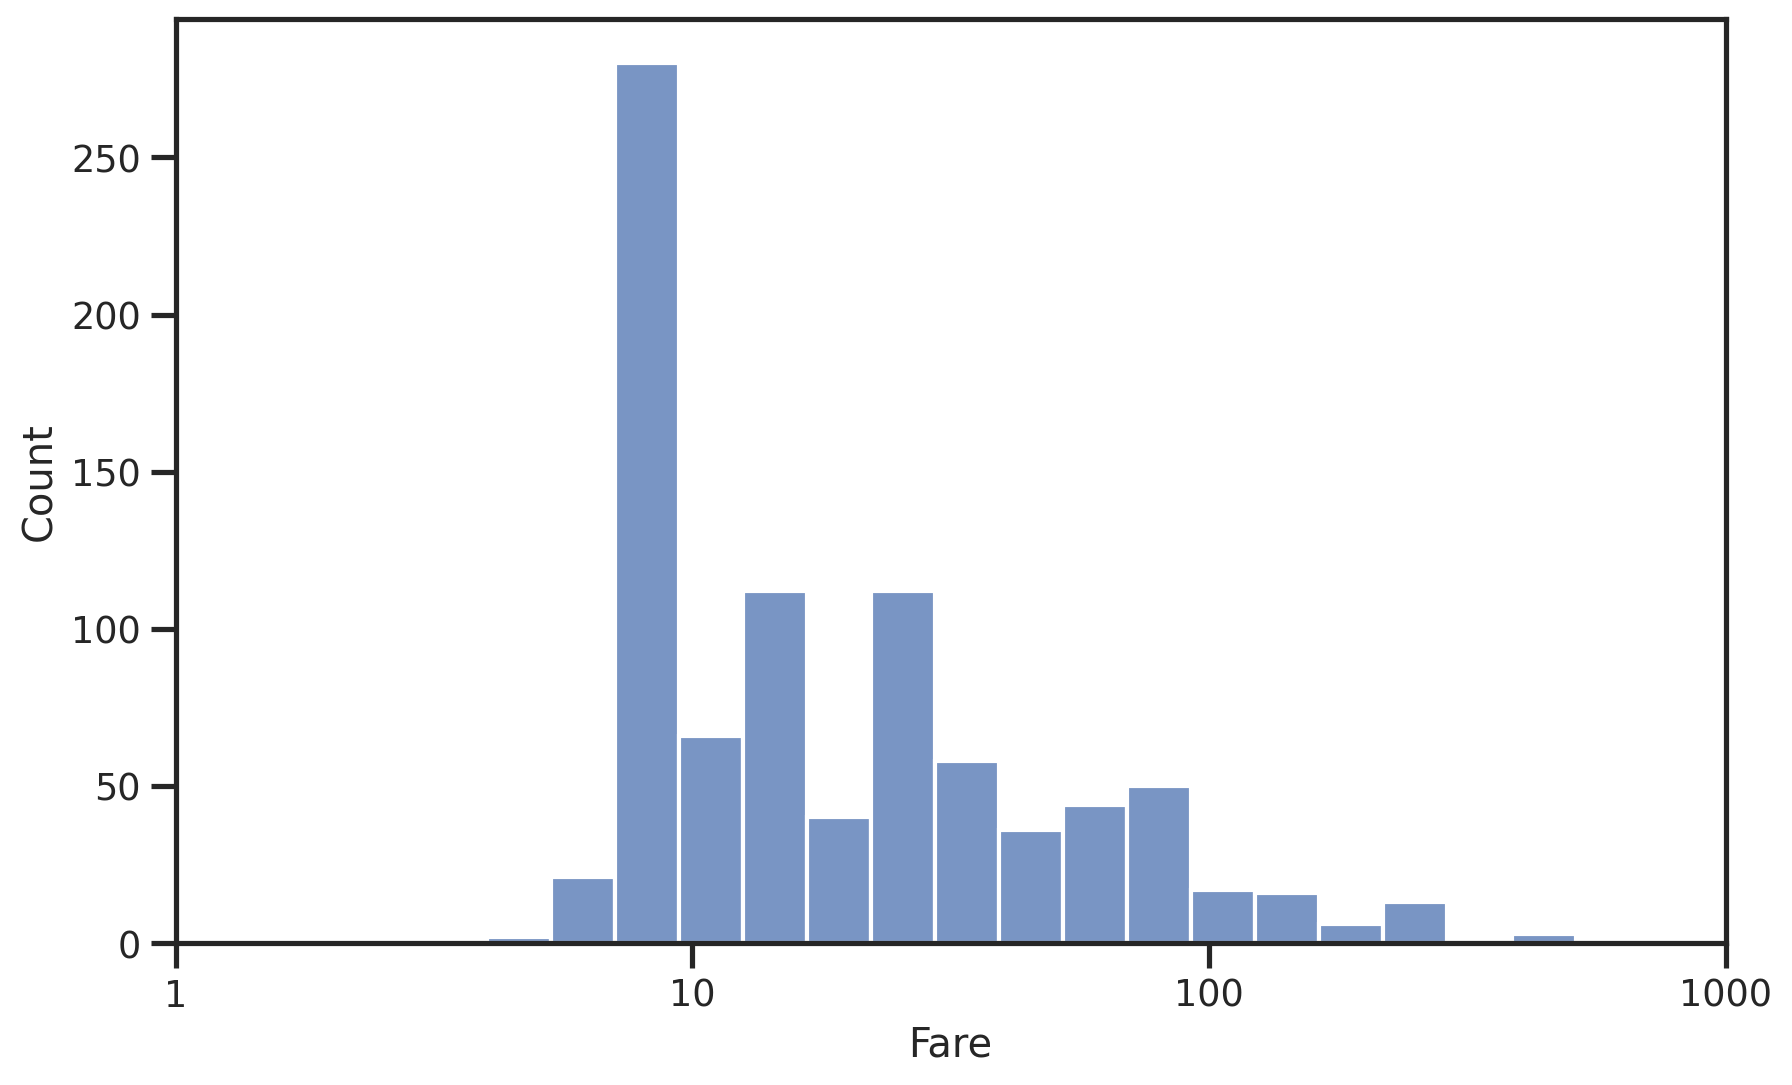

In [51]:
ax = sns.histplot(np.log10(titanic.loc[ titanic['Fare']>0, 'Fare' ]))
ax.set_xticks(range(0,4))
ax.set_xticklabels(np.power(10, range(0,4)));

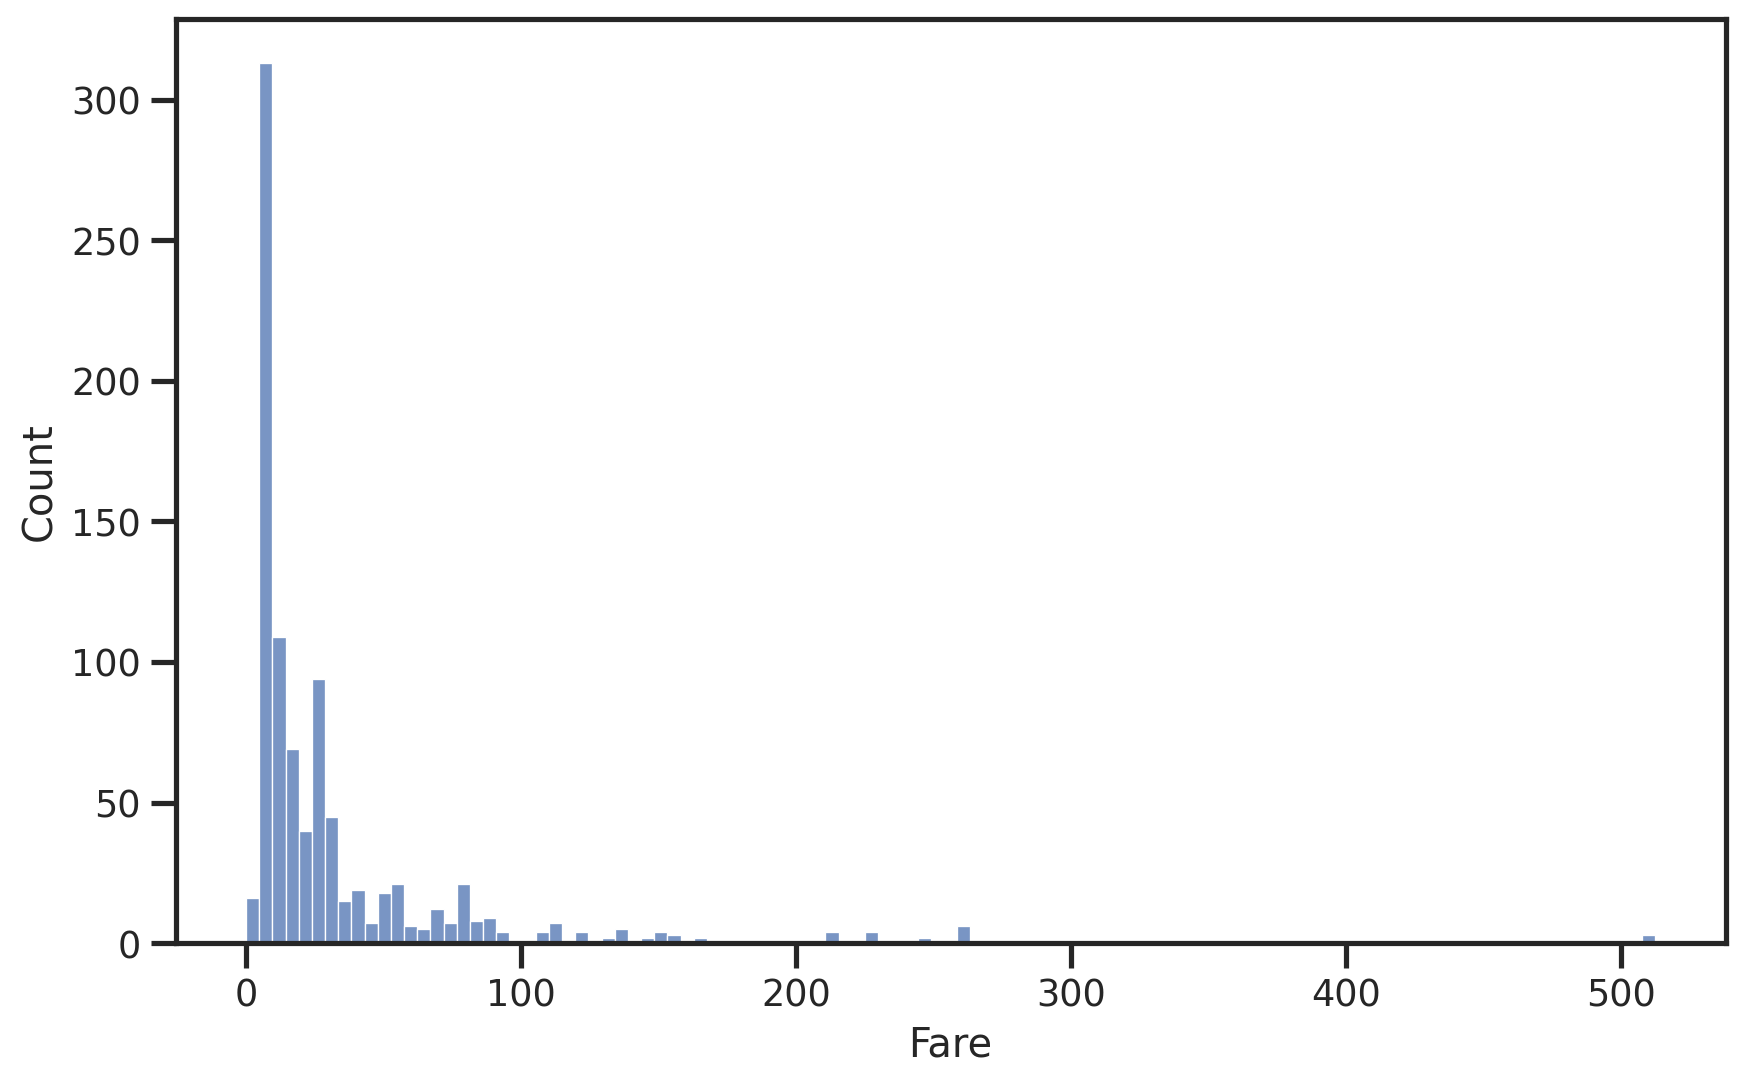

In [52]:
# for comparison
sns.histplot(titanic['Fare']);